# Multi-armed bandits: A gentle introduction to reinforcement learning

Michael Bloem

Mosaic Data Science

7 March 2019

mbloem@mosaicdatascience.com

This notebook demonstrates a couple of reinforcement learning policies for the multi-armed bandit problem.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import os

In [2]:
from bandits import Bandits, RandomStrategy, epsilonGreedyStrategy, BayesianStrategy

In [11]:
import numpy as np

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

## Build some bandits

In [4]:
demo_bandits = Bandits([0.3, 0.4, 0.5])

## Build some demonstration policies

## Compare performance

In [30]:
NUM_EXPERIMENTS = 30
NUM_PULLS = 10000
BANDITS_PROBS = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [40]:
EPS_1 = 0.1
EPS_2 = 0.01

In [41]:
bandits = Bandits(BANDITS_PROBS)

In [48]:
# I'll keep a cumulative sum in these, then divide by the number of experiments at the end
random_total_regret = np.zeros(NUM_PULLS)
eps1_greedy_total_regret = np.zeros(NUM_PULLS)
eps2_greedy_total_regret = np.zeros(NUM_PULLS)
bayes_total_regret = np.zeros(NUM_PULLS)

random_total_reward = np.zeros(NUM_PULLS)
eps1_greedy_total_reward = np.zeros(NUM_PULLS)
eps2_greedy_total_reward = np.zeros(NUM_PULLS)
bayes_total_reward = np.zeros(NUM_PULLS)

for experiment in range(NUM_EXPERIMENTS):
    random_policy = RandomStrategy(bandits)
    random_policy.sample(NUM_PULLS)
    random_total_regret += np.cumsum(random_policy.regret)
    random_total_reward += np.cumsum(random_policy.score)
    
    eps1_greedy_policy = epsilonGreedyStrategy(bandits, EPS_1)
    eps1_greedy_policy.sample(NUM_PULLS)
    eps1_greedy_total_regret += np.cumsum(eps1_greedy_policy.regret)
    eps1_greedy_total_reward += np.cumsum(eps1_greedy_policy.score)
    
    eps2_greedy_policy = epsilonGreedyStrategy(bandits, EPS_2)
    eps2_greedy_policy.sample(NUM_PULLS)
    eps2_greedy_total_regret += np.cumsum(eps2_greedy_policy.regret)
    eps2_greedy_total_reward += np.cumsum(eps2_greedy_policy.score)
    
    bayes_policy = BayesianStrategy(bandits)
    bayes_policy.sample(NUM_PULLS)
    bayes_total_regret += np.cumsum(bayes_policy.regret)
    bayes_total_reward += np.cumsum(bayes_policy.score)
    
random_total_regret = random_total_regret/NUM_EXPERIMENTS
eps1_greedy_total_regret = eps1_greedy_total_regret/NUM_EXPERIMENTS
eps2_greedy_total_regret = eps2_greedy_total_regret/NUM_EXPERIMENTS
bayes_total_regret = bayes_total_regret/NUM_EXPERIMENTS

random_total_reward = random_total_reward/NUM_EXPERIMENTS
eps1_greedy_total_reward = eps1_greedy_total_reward/NUM_EXPERIMENTS
eps2_greedy_total_reward = eps2_greedy_total_reward/NUM_EXPERIMENTS
bayes_total_reward = bayes_total_reward/NUM_EXPERIMENTS

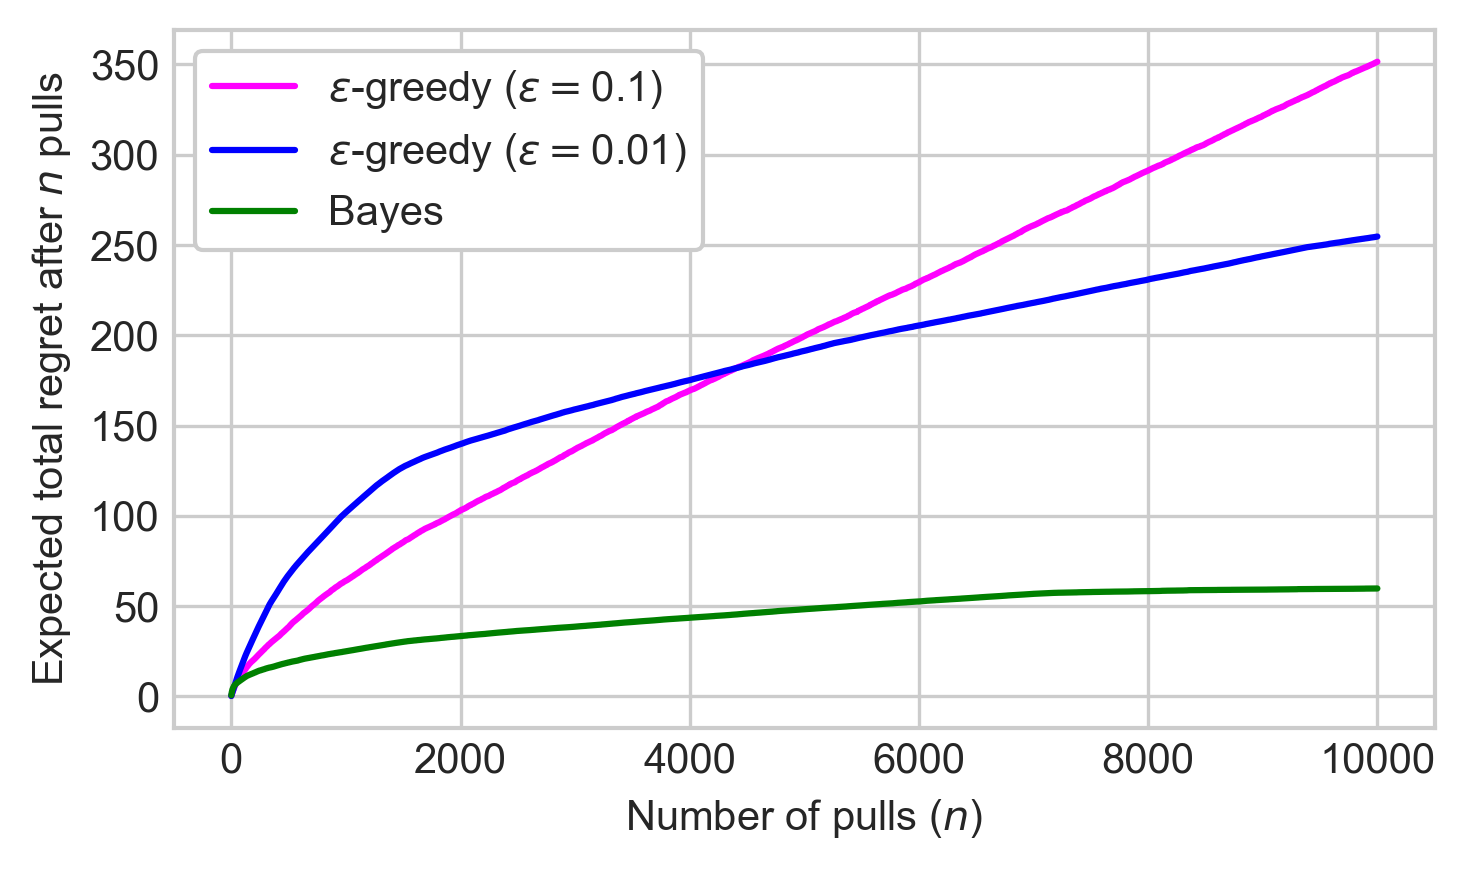

In [52]:
fig, ax = plt.subplots(figsize=(5,3))

# ax = plt.plot(random_total_regret,
#               color='gray',
#               label='random',
#              )

ax = plt.plot(eps1_greedy_total_regret,
              color='magenta',
              label='$\epsilon$-greedy ($\epsilon=${})'.format(EPS_1),
             )

ax = plt.plot(eps2_greedy_total_regret,
              color='blue',
              label='$\epsilon$-greedy ($\epsilon=${})'.format(EPS_2),
             )

ax = plt.plot(bayes_total_regret,
              color='green',
              label='Bayes',
             )

plt.ylabel('Expected total regret after $n$ pulls')
plt.xlabel('Number of pulls ($n$)')

plt.legend(loc='best', framealpha=1, frameon=True)

plt.tight_layout()

fig.savefig(os.path.join('output','plots','expected_total_regret.png'))

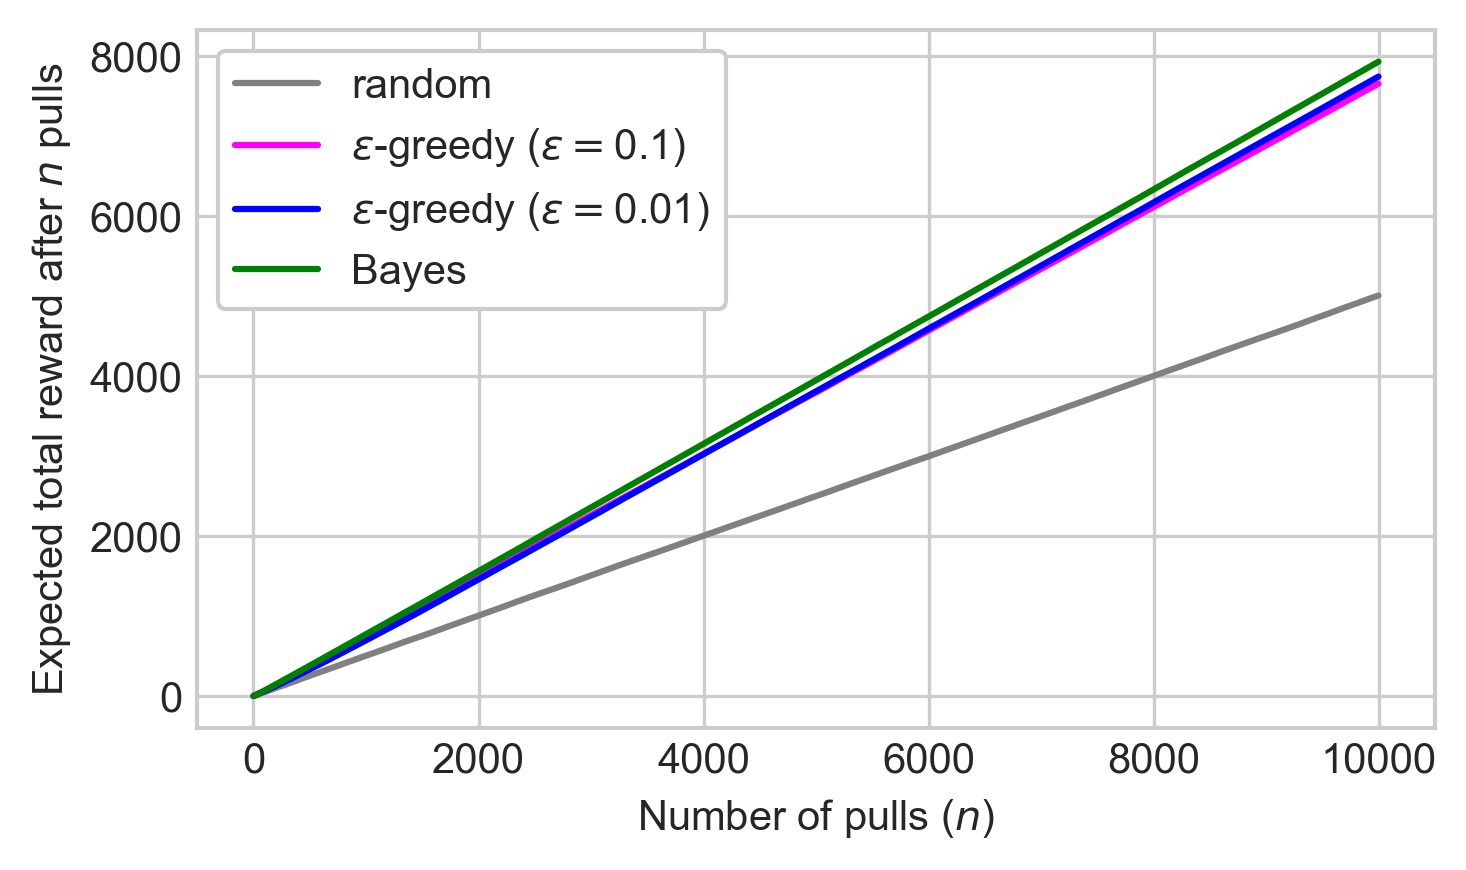

In [53]:
fig, ax = plt.subplots(figsize=(5,3))

ax = plt.plot(random_total_reward,
              color='gray',
              label='random',
             )

ax = plt.plot(eps1_greedy_total_reward,
              color='magenta',
              label='$\epsilon$-greedy ($\epsilon=${})'.format(EPS_1),
             )

ax = plt.plot(eps2_greedy_total_reward,
              color='blue',
              label='$\epsilon$-greedy ($\epsilon=${})'.format(EPS_2),
             )

ax = plt.plot(bayes_total_reward,
              color='green',
              label='Bayes',
             )

plt.ylabel('Expected total reward after $n$ pulls')
plt.xlabel('Number of pulls ($n$)')

plt.legend(loc='best', framealpha=1, frameon=True)

plt.tight_layout()

fig.savefig(os.path.join('output','plots','expected_total_rewards.png'))